In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
##https://machinelearningmastery.com/keras-functional-api-deep-learning/
visible = Input(shape=(7,))
hidden1 = Dense(16, activation='sigmoid')(visible)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


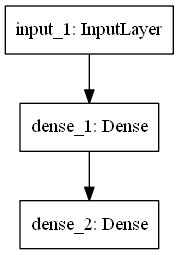

In [3]:
from IPython.display import display
from PIL import Image

display(Image.open('multilayer_perceptron_graph.png'))

In [4]:
x = np.array([[0, 1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1, 0],
                     [1, 2, 3, 4, 5, 6, 7],[7, 6, 5, 4, 3, 2, 1],
                     [2, 3, 4, 5, 6, 7, 8],[8, 7, 6, 5, 4, 3, 2],
                     [3, 4, 5, 6, 7, 8, 9],[9, 8, 7, 6, 5, 4, 3],
                     [4, 5, 6, 7, 8, 9, 10],[10, 9, 8, 7, 6, 5, 4],
                     [5, 6, 7, 8, 9, 10, 11],[11, 10, 9, 8, 7, 6, 5],
                     [6, 7, 8, 9, 10, 11, 12],[12, 11, 10, 9, 8, 7, 6]])
y = np.array([[1], [0], [1], [0],[1], [0], [1], 
                     [1], [0], [1], [0],[1], [0], [1]])

In [5]:
#https://keras.io/optimizers/
sgd = 'sgd' #optimizers.SGD(lr=0.1, clipnorm=1.) #'sgd' #
model.compile(loss='binary_crossentropy'            
            , optimizer=sgd
            , metrics=['accuracy']) 

In [6]:
history = model.fit(x, y 
                    , epochs=500 
                    , batch_size=1 
                    # Number of observations per batch 
                    #, verbose=0 # No output 
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
14/14 [==============================] - 3s 206ms/step - loss: 0.8804 - acc: 0.4286
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7914 - acc: 0.2857
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7507 - acc: 0.4286
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7308 - acc: 0.5000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7210 - acc: 0.5000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7145 - acc: 0.3571
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7104 - acc: 0.5000
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7054 - acc: 0.5000
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - acc: 0.5000
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6967 - acc: 0.5000
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.5885 - acc: 0.7143
Epoch 85/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5875 - acc: 0.7143
Epoch 86/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5856 - acc: 0.7143
Epoch 87/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5825 - acc: 0.7143
Epoch 88/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5842 - acc: 0.7857
Epoch 89/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5829 - acc: 0.7857
Epoch 90/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5806 - acc: 0.7143
Epoch 91/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5786 - acc: 0.7857
Epoch 92/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5783 - acc: 0.7143
Epoch 93/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5774 - acc: 0.7857
Epoch 94/500
14/14 [==============================] - 0s 2ms/st

14/14 [==============================] - 0s 2ms/step - loss: 0.4732 - acc: 0.9286
Epoch 170/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4744 - acc: 0.7857
Epoch 171/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4738 - acc: 0.8571
Epoch 172/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4726 - acc: 0.7857
Epoch 173/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4704 - acc: 0.8571
Epoch 174/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4677 - acc: 0.8571
Epoch 175/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4681 - acc: 0.8571
Epoch 176/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4667 - acc: 0.8571
Epoch 177/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4639 - acc: 0.9286
Epoch 178/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4655 - acc: 0.8571
Epoch 179/500
14/14 [==============================] -

14/14 [==============================] - 0s 2ms/step - loss: 0.3744 - acc: 0.9286
Epoch 255/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3717 - acc: 0.9286
Epoch 256/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3723 - acc: 0.9286
Epoch 257/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3686 - acc: 1.0000
Epoch 258/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3695 - acc: 0.9286
Epoch 259/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3674 - acc: 1.0000
Epoch 260/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3675 - acc: 0.9286
Epoch 261/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3652 - acc: 1.0000
Epoch 262/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3653 - acc: 1.0000
Epoch 263/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3632 - acc: 1.0000
Epoch 264/500
14/14 [==============================] -

14/14 [==============================] - 0s 2ms/step - loss: 0.2964 - acc: 1.0000
Epoch 340/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2912 - acc: 1.0000
Epoch 341/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2944 - acc: 0.9286
Epoch 342/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2936 - acc: 1.0000
Epoch 343/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2897 - acc: 1.0000
Epoch 344/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2925 - acc: 0.9286
Epoch 345/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2912 - acc: 1.0000
Epoch 346/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2908 - acc: 1.0000
Epoch 347/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2871 - acc: 1.0000
Epoch 348/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2896 - acc: 1.0000
Epoch 349/500
14/14 [==============================] -

14/14 [==============================] - 0s 2ms/step - loss: 0.2397 - acc: 1.0000
Epoch 425/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2383 - acc: 1.0000
Epoch 426/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2373 - acc: 1.0000
Epoch 427/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2359 - acc: 1.0000
Epoch 428/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2365 - acc: 1.0000
Epoch 429/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2368 - acc: 1.0000
Epoch 430/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2331 - acc: 1.0000
Epoch 431/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2350 - acc: 1.0000
Epoch 432/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2344 - acc: 1.0000
Epoch 433/500
14/14 [==============================] - 0s 2ms/step - loss: 0.2334 - acc: 1.0000
Epoch 434/500
14/14 [==============================] -

In [7]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step
Accuracy: 100.00


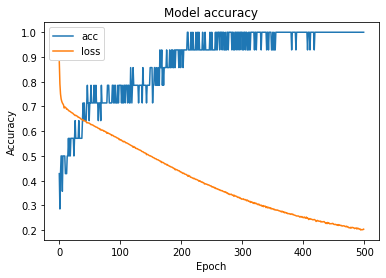

In [10]:
import matplotlib.pyplot as plt

#print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [12]:
test = np.array([[0, 1, 2, 3, 4, 5, 6],[6, 5, 4, 3, 2, 1, 0],[1, 2, 3, 4, 5, 6, 7],[7, 6, 5, 4, 3, 2, 1]])
predictions = model.predict(test)
rounded = [x for x in predictions]

for i in range(len(rounded)):
    print('predict',rounded[i])
    print('%s => %d (expected %d)' % (x[i].tolist(), np.round(rounded[i]), y[i]))

predict [0.9362937]
[0, 1, 2, 3, 4, 5, 6] => 1 (expected 1)
predict [0.03501275]
[6, 5, 4, 3, 2, 1, 0] => 0 (expected 0)
predict [0.92503154]
[1, 2, 3, 4, 5, 6, 7] => 1 (expected 1)
predict [0.06804082]
[7, 6, 5, 4, 3, 2, 1] => 0 (expected 0)


In [13]:
test = np.array([[ 1, 2, 3, 4, 5, 6, 7 ],[ 1, 2, 3, 4, 5, 4, 3 ],[ 1, 2, 3, 4, 3, 2, 2 ],[ 1, 2, 3, 2, 1, 0, 1 ]])
predictions = model.predict(test)
rounded = [x for x in predictions]

for i in range(len(rounded)):
    print('predict',rounded[i])
    print('%s => %d' % (test[i].tolist(), np.round(rounded[i])))

predict [0.92503154]
[1, 2, 3, 4, 5, 6, 7] => 1
predict [0.81388533]
[1, 2, 3, 4, 5, 4, 3] => 1
predict [0.7191423]
[1, 2, 3, 4, 3, 2, 2] => 1
predict [0.2205998]
[1, 2, 3, 2, 1, 0, 1] => 0
